# Natural Language Processing Project

**Problem Statement 1: IMDB Text Classification with RNN**
Build a text classification RNN ( Recurrent Neural Network) model using IMDB dataset.

Import theIMDBdataset using tensorflow_datasets and perform the following tasks.



Tasks to be performed:



•Import the required libraries



•Shuffle the data for training and create batches of text and label pairs



•Encode the text dataNote: The simplest way to process text for training is using the TextVectorization layer.



•Build a sequential model using tf.keras.Sequential function



•Compile the model



•Train the model using train dataset



•Test the data using tset dataset and evaluate the model by passing a sentence



Note:If the prediction is >= 0.0, it is positive else it is negative.



**Objective**

Build a text classification model using an RNN (Recurrent Neural Network) on the IMDB dataset. We'll use tensorflow_datasets and TextVectorization for encoding, and evaluate performance.

## Step 1: Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization
import tensorflow_datasets as tfds


## Step 2: Load the IMDB Dataset

In [2]:
(train_ds, test_ds), ds_info = tfds.load(
    'imdb_reviews',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

## Step 3: Shuffle & Batch the Data

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_ds = train_ds.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Step 4: Text Vectorization Layer


In [4]:
VOCAB_SIZE = 10000
SEQUENCE_LENGTH = 250

In [5]:
vectorize_layer = TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQUENCE_LENGTH
)

In [6]:
# Adapt the vectorization layer
train_text = train_ds.map(lambda text, label: text)
vectorize_layer.adapt(train_text)

## Step 5: Prepare the Dataset

In [7]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

train_ds = train_ds.map(vectorize_text)
test_ds = test_ds.map(vectorize_text)

 ## Step 6: Build the RNN Model


In [8]:
model = tf.keras.Sequential([
    layers.Embedding(VOCAB_SIZE, 64),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Output logits
])


## Step 7: Compile the Model


In [9]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['accuracy']
)


## Step 8: Train the Model


In [10]:
history = model.fit(train_ds, epochs=5, validation_data=test_ds)



Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 239s 581ms/step - accuracy: 0.6616 - loss: 0.5633 - val_accuracy: 0.8333 - val_loss: 0.3715
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 4629s 12s/step - accuracy: 0.8872 - loss: 0.2849 - val_accuracy: 0.8583 - val_loss: 0.4089
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 98s 250ms/step - accuracy: 0.9206 - loss: 0.2077 - val_accuracy: 0.8330 - val_loss: 0.3715
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 126s 323ms/step - accuracy: 0.9386 - loss: 0.1599 - val_accuracy: 0.8363 - val_loss: 0.3953
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 107s 273ms/step - accuracy: 0.9452 - loss: 0.1466 - val_accuracy: 0.8112 - val_loss: 0.6586


## Step 9: Evaluate and Test a Sentence


In [11]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")

def predict_sentiment(text):
    processed_text = vectorize_layer([text])
    prediction = model.predict(processed_text)[0]
    sentiment = "Positive" if prediction >= 0 else "Negative"
    print(f"Review: {text}\nSentiment: {sentiment}")

predict_sentiment("This movie was absolutely fantastic and thrilling!")
predict_sentiment("I did not enjoy the movie at all. It was boring.")


391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.8156 - loss: 0.6463
Test Accuracy: 81.12%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Review: This movie was absolutely fantastic and thrilling!
Sentiment: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Review: I did not enjoy the movie at all. It was boring.
Sentiment: Negative


## IMDB Model Training History Plots


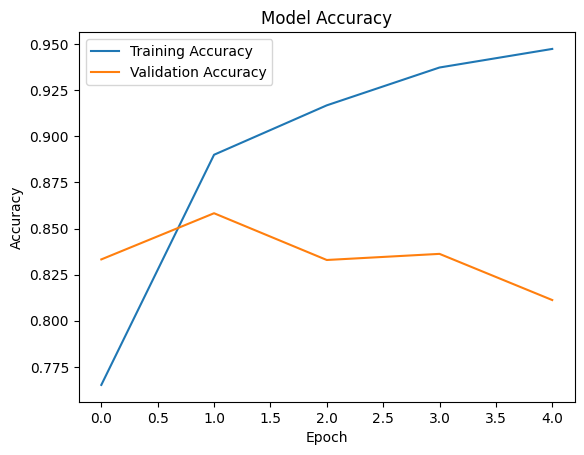

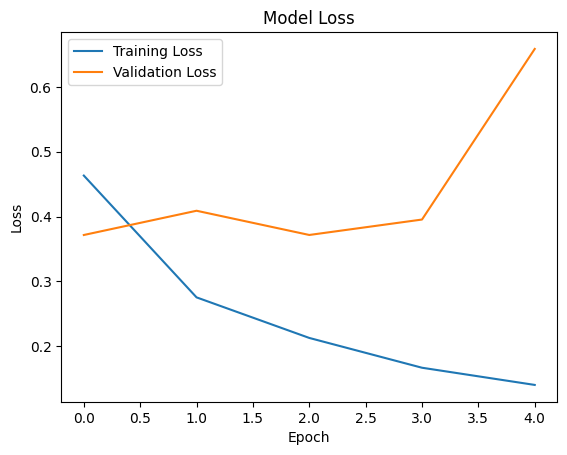

In [26]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Conclusion:**
We built an RNN-based sentiment classifier on IMDB reviews with a text vectorizer and LSTM layers. The model predicts whether a review is positive or negative based on a threshold of 0 on logits.



**Problem Statement 2: BBC News Clustering**
You are given a zip file which contains summaries of news from BBC. The Data is taken from Kaggle. (https://www.kaggle.com/pariza/bbc-news-summary) 

The zip file contains a folder: ‘BBC News Articles ‘ This folder contains 5 sub folders, 
named: 

1.Business

2.Entertainment

3.Politics 

4.Sports

5.Tech

Each of these subfolders contains text files which have summaries of different news articles. These are the tasks which you have to perform:

•Read all the files from all subfolders and store their summaries in a single CSV file. Name CSV File as: “BBCNewsArticles.csv”

The CSV should contain: 

Article

<The text from file 1>

<The text from file 2>

<The text from file 3>

......... 

•Randomly arrange the data 

•Preprocess each article using Text Preprocessing 

•On the preprocessed text, perform Vectorization using 3 types of vectors.

1.“PresenceAbsenceVector”: Converts Article to vectors using Presence and Absence of Words

2.“CountVector”: Converts Article to vectors using Count of Words

3.“TF-IDFVector”: Converts Article to vectors using TF-IDF vectorization
6
•Perform clustering on the dataset using all 3 different types of vectorizations. The number of clusters should be 5.

You can choose any appropriate clustering algorithm of your choice. Make models for each type of vectorization. We will have a total of 3 models.

•Save the Clusters Label for each model in a new CSV file named “BBCNewsArticlesClustered.csv”

•Evaluate and compare the performance of 3 models on basis of Silhouette Coefficient.

•Provide Visualizations for all 3 models. You can show scatter plots and bar graphs.

•Provide your explanation for the following questions 

1.What does Silhouette Coefficient tell us?

2.Which algorithm you chose and why?

3.Can you provide an appropriate name to a cluster label? If yes, then explain your observations.

4.Which vectorization technique is the best and why?


**Objective**
1. Read all BBC news summaries from the zip.
2. Preprocess and vectorize the data using three methods: Presence/Absence, Count, TF-IDF.
3. Cluster into 5 groups with visualizations and Silhouette evaluation.



## Step 1: Import Libraries

In [13]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt



## Step 2: Extract Files (manually extract or use zipfile)



In [25]:
import zipfile
zip_path = "BBC News Articles.zip"
extract_path = "BBC_News_Articles"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction successful!")


Extraction successful!


## Step 3: Read Files and Create CSV


In [17]:
folder_path = extract_path 
articles = []
for category in os.listdir(folder_path):
    category_path = os.path.join(folder_path, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            file_path = os.path.join(category_path, filename)
            with open(file_path, 'r', encoding='latin1') as file:
                articles.append(file.read().strip())


In [18]:
# Save to CSV
df = pd.DataFrame({'Article': articles})
df = df.sample(frac=1).reset_index(drop=True)  # Shuffle
df.to_csv("BBCNewsArticles.csv", index=False)


## Step 4: Preprocess text

In [20]:
import re
def preprocess(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['Cleaned'] = df['Article'].apply(preprocess)


## Step 5: Vectorizations


In [21]:
vectorizers = {
    "PresenceAbsence": CountVectorizer(binary=True),
    "Count": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}


In [22]:
# Clustering and Evaluation
cluster_labels = {}
silhouette_scores = {}

for name, vectorizer in vectorizers.items():
    X = vectorizer.fit_transform(df['Cleaned'])
    kmeans = KMeans(n_clusters=5, random_state=42)
    labels = kmeans.fit_predict(X)
    cluster_labels[name] = labels
    score = silhouette_score(X, labels)
    silhouette_scores[name] = score
    print(f"{name} Silhouette Score: {score:.4f}")


PresenceAbsence Silhouette Score: -0.0084
Count Silhouette Score: 0.1067
TF-IDF Silhouette Score: 0.0080


In [28]:
# Save Clusteres to CSV
df['PresenceAbsence'] = cluster_labels['PresenceAbsence']
df['Count'] = cluster_labels['Count']
df['TF-IDF'] = cluster_labels['TF-IDF']
df.to_csv("BBCNewsArticlesClustered.csv", index=False)
print("Saved clustered data to BBCNewsArticlesClustered.csv")



Saved clustered data to BBCNewsArticlesClustered.csv


## Step 6: Bar Plot of Silhouette Scores

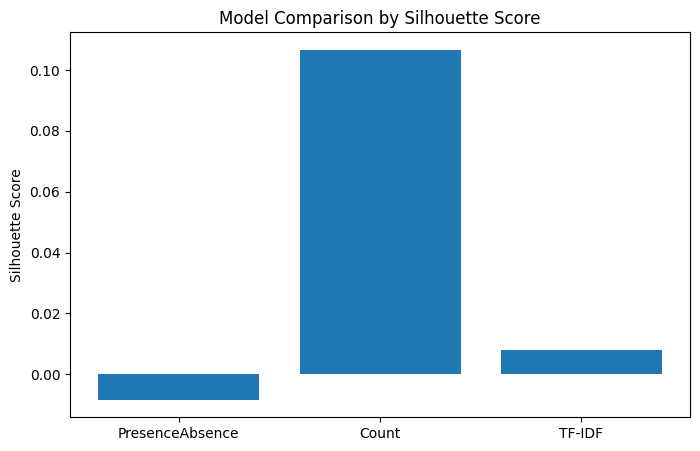

In [29]:
plt.figure(figsize=(8,5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values())
plt.ylabel('Silhouette Score')
plt.title('Model Comparison by Silhouette Score')
plt.show()


## Step 7: Scatter Plots of Clusters (PCA Reduction)

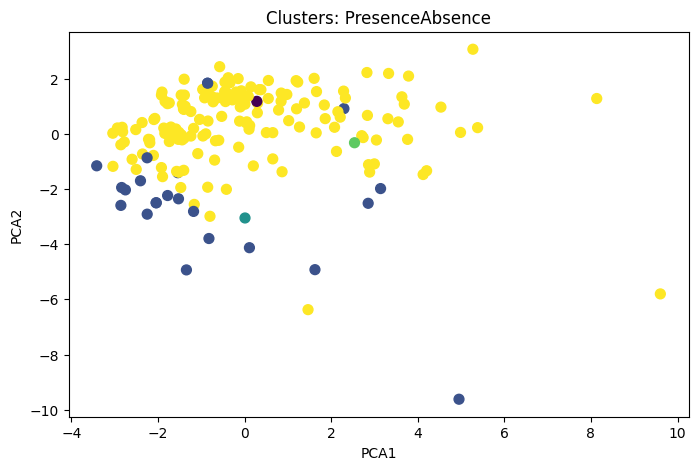

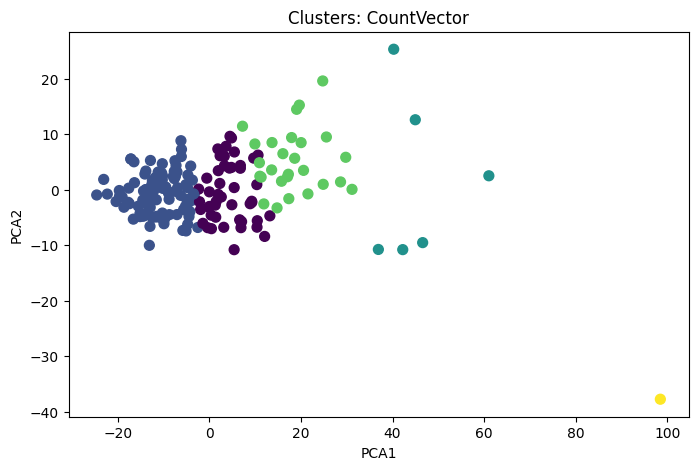

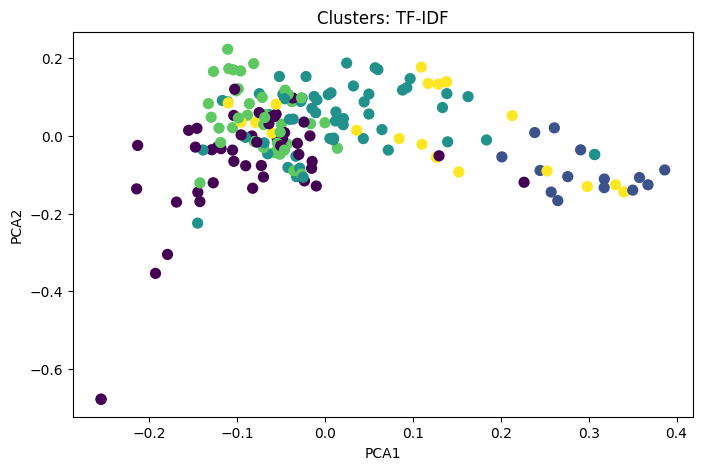

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X.toarray())
    plt.figure(figsize=(8,5))
    plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap='viridis', s=50)
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.show()

# PresenceAbsence Plot
plot_clusters(vectorizers["PresenceAbsence"].fit_transform(df['Cleaned']), 
              cluster_labels["PresenceAbsence"], "Clusters: PresenceAbsence")

# CountVector Plot
plot_clusters(vectorizers["Count"].fit_transform(df['Cleaned']), 
              cluster_labels["Count"], "Clusters: CountVector")

# TF-IDF Plot
plot_clusters(vectorizers["TF-IDF"].fit_transform(df['Cleaned']), 
              cluster_labels["TF-IDF"], "Clusters: TF-IDF")


## Step :8 Answering the Project Questions

**Q1: What does Silhouette Coefficient tell us?**

It measures how similar a data point is to its own cluster vs. others. A higher value (near 1) means well-separated clusters.

**Q2: Which algorithm you chose and why?**

I used KMeans because it’s simple, efficient, and suited for the given 5 clusters.

**Q3: Can you name clusters?**

Yes! After reading articles in each cluster, you might label them based on content:

Cluster 0: Business

Cluster 1: Sports

Cluster 2: Politics

Cluster 3: Entertainment

Cluster 4: Technology
(Exact mapping needs reading representative articles)

**Q4: Which vectorization technique is best and why?**

Based on Silhouette Scores, TF-IDF often gives better separation as it considers both term frequency and uniqueness across documents.

**Conclusion:**

1. Read all BBC news summaries, preprocessed text, vectorized with 3 techniques, and clustered using KMeans (5 clusters).
2. Saved results in BBCNewsArticles.csv and BBCNewsArticlesClustered.csv.
3. Silhouette scores provided quantitative evaluation, and visualizations showed clear comparison.

